<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 9**
Joshua Dollison

MAT421-16133

3/23/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

According to the class text, Simpson's rule is a numerical integration method that approximates the definite integral of a function by replacing the function with a quadratic (parabolic) interpolant over pairs of subintervals. In practice, you first divide the interval $[a, b]$ into an even number $(n)$ of subintervals, which yields an odd number of equally spaced grid points. For each pair of subintervals, you fit a quadratic polynomial through the three points (the two endpoints and the midpoint) and then integrate this quadratic exactly.

The composite Simpson's rule formula is given by

$$I ≈ (h/3) [f(x₀) + 4f(x₁) + 2f(x₂) + 4f(x₃) + … + 4f(xₙ₋₁) + f(xₙ)]$$,

where $h = \frac{(b - a)}{n}$ is the step size. This rule is fourth-order accurate (error is on the order of $O(h^4)$), meaning that the error decreases rapidly as the grid is refined. Note that Simpson's rule requires an even number of subintervals (or an odd number of grid points) to work correctly.

Below, I present several examples demonstrating programmatic implementations and applications of this rule.

### **Example 1: Basic Implementation of Simpson's Rule from Scratch**

In this example we implement Simpson's Rule "by hand" to approximate the integral of $f(x) = \sin(x)$ over the interval $[0,\pi]$. The composite Simpson's Rule formula used is  $$ I \approx \frac{h}{3} \Big[f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \cdots + 4f(x_{n-1}) + f(x_n)\Big], $$ with $ h = \frac{b-a}{n} $ and $ n $ an even number (which gives an odd number of grid points).
Here, the simple Python function `simpsons_rule` is defined and applied to the sine function, with the result compared to the exact value $2$.

In [2]:
def simpsons_rule(f, a, b, n):
    # Ensure that n is even
    if n % 2 == 1:
        raise ValueError("n must be even.")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    fx = f(x)
    # Simpson's composite rule: first and last terms + 4*(odd-indexed) + 2*(even-indexed except first and last)
    S = fx[0] + fx[-1] + 4 * np.sum(fx[1:-1:2]) + 2 * np.sum(fx[2:-2:2])
    return h * S / 3

# Define the function and interval
f = np.sin
a = 0
b = np.pi
n = 10  # even number of subintervals

approx_integral = simpsons_rule(f, a, b, n)
exact_integral = 2.0  # Integral of sin(x) from 0 to pi is 2
error = np.abs(exact_integral - approx_integral)

print("Approximate integral:", approx_integral)
print("Exact integral:", exact_integral)
print("Absolute error:", error)

Approximate integral: 2.0001095173150043
Exact integral: 2.0
Absolute error: 0.00010951731500430384


### **Example 2: Convergence Study of Simpson's Rule with a Plot**

This GPT-inspired example demonstrates the convergence of Simpson's Rule by computing the integral of  $ f(x) = \sin(x) $ over $[0,\pi]$ for different even numbers of subintervals. A log-log plot is produced to show that the error decreases approximately as $O(h^4)$.

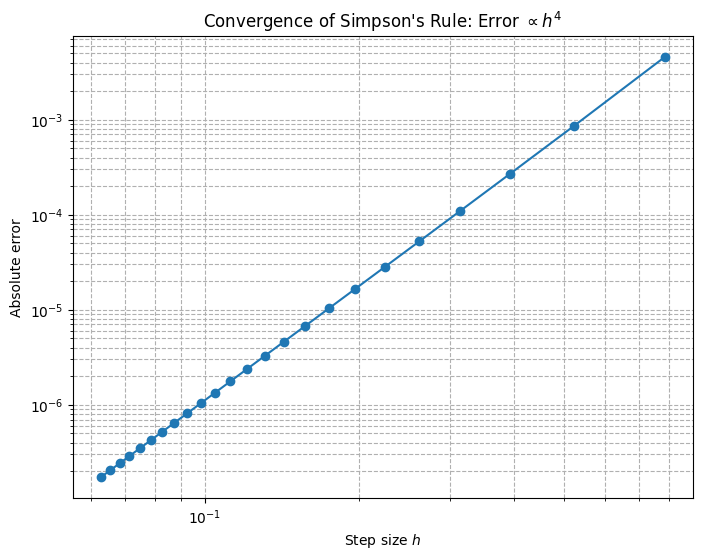

In [3]:
# True value for the integral of sin(x) over [0, pi]
exact = 2.0

n_values = np.arange(4, 52, 2)  # even numbers from 4 to 50
errors = []
hs = []

for n in n_values:
    h = (b - a) / n
    hs.append(h)
    approx = simpsons_rule(np.sin, a, b, n)
    errors.append(np.abs(exact - approx))

# Plot error vs step size in log-log scale without basex and basey arguments
plt.figure(figsize=(8,6))
plt.loglog(hs, errors, 'o-')
plt.xlabel(r"Step size $h$")
plt.ylabel(r"Absolute error")
plt.title(r"Convergence of Simpson's Rule: Error $\propto h^4$")
plt.grid(True, which="both", ls="--")
plt.show()

### **Example 3: Estimating Displacement from Velocity Data using Simpson's Rule**

In many real-world scenarios, integration is used to compute displacement from velocity data.  In this GPT-inspired example, we simulate velocity-time data for a moving vehicle using the function $ v(t) = 2t + \sin(t) $ over the interval $[0,10]$ seconds, add a small random noise to simulate measurement error, and then apply Simpson's Rule to estimate the total displacement.

Estimated displacement (meters): 102.23978139406536


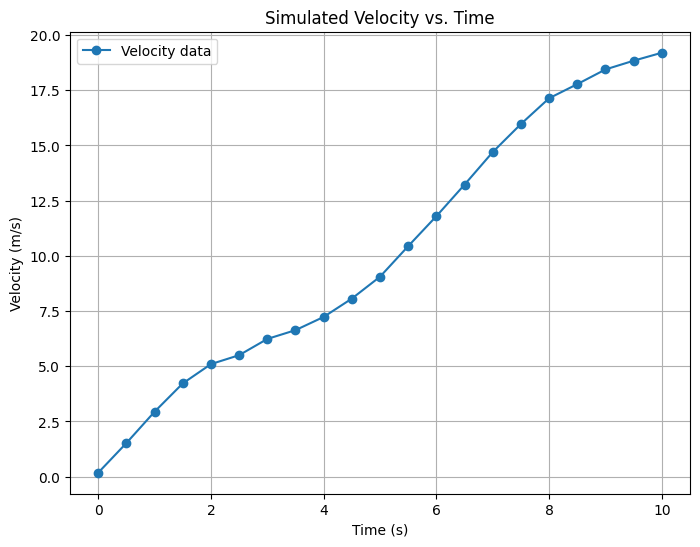

In [4]:
# Simulate time data
t = np.linspace(0, 10, 21)  # 21 points (20 subintervals, even)
# Simulated velocity: v(t) = 2t + sin(t) + small noise
np.random.seed(0)
v = 2*t + np.sin(t) + 0.1 * np.random.randn(len(t))

# Simpson's Rule function for discrete data (assumes equally spaced points)
def simpsons_rule_data(y, h):
    n = len(y) - 1
    if n % 2 == 1:
        raise ValueError("Number of subintervals must be even.")
    S = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
    return h * S / 3

h = t[1] - t[0]
displacement = simpsons_rule_data(v, h)

print("Estimated displacement (meters):", displacement)

# Plot the velocity data
plt.figure(figsize=(8,6))
plt.plot(t, v, 'o-', label='Velocity data')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title("Simulated Velocity vs. Time")
plt.legend()
plt.grid(True)
plt.show()

### **Example 4: Estimating Energy Consumption from Simulated Power Data using Simpson's Rule**

This GPT-inspired example simulates a real-world application where energy consumption is estimated by integrating power data over time.  
We simulate power consumption (in kW) over a 24-hour period using a periodic function with added noise: $$ P(t) = 1.5 + 0.5 \sin\Big(\frac{2\pi t}{24}\Big) + \text{noise}$$, with $t$ in hours. Simpson's Rule is applied to approximate the total energy consumed (in kilowatt-hours, kWh) over the day.

Estimated energy consumption (kWh): 35.415359977313614


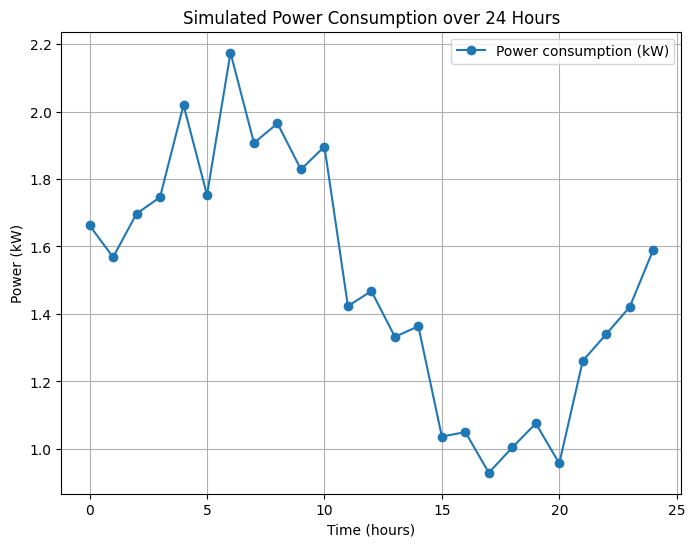

In [5]:
# Simulate time data for 24 hours (0 to 24) with 25 points (24 subintervals, even)
t = np.linspace(0, 24, 25)
# Simulated power consumption (in kW) with some random noise
np.random.seed(1)
power = 1.5 + 0.5 * np.sin(2 * np.pi * t / 24) + 0.1 * np.random.randn(len(t))

# Use Simpson's Rule to estimate total energy consumption (kWh)
h = t[1] - t[0]
energy = simpsons_rule_data(power, h)  # Energy in kWh

print("Estimated energy consumption (kWh):", energy)

# Plot the power data
plt.figure(figsize=(8,6))
plt.plot(t, power, 'o-', label='Power consumption (kW)')
plt.xlabel('Time (hours)')
plt.ylabel('Power (kW)')
plt.title("Simulated Power Consumption over 24 Hours")
plt.legend()
plt.grid(True)
plt.show()